In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
train = pd.read_csv('titanic_data.csv')
test = pd.read_csv('test.csv')

print(train.shape, test.shape)
train.head()

(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='count'>

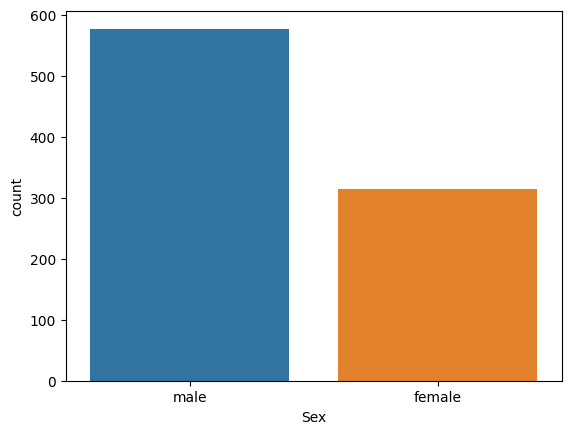

In [41]:
sns.countplot(x='Sex',data=train)
# more males

Percentage of women survived: 74.20382165605095
Percentage of men survived: 18.890814558058924


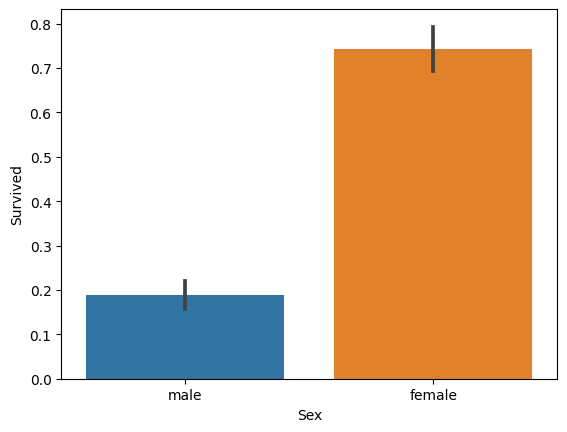

In [42]:
sns.barplot(x='Sex',y='Survived',data=train)
print('Percentage of women survived:',train['Survived'][train['Sex'] == 'female'].value_counts(normalize=True)[1]*100)
print('Percentage of men survived:',train['Survived'][train['Sex'] == 'male'].value_counts(normalize=True)[1]*100)

Percentage of PClass1 survived: 62.96296296296296
Percentage of PClass2 survived: 47.28260869565217
Percentage of PClass3 survived: 24.236252545824847


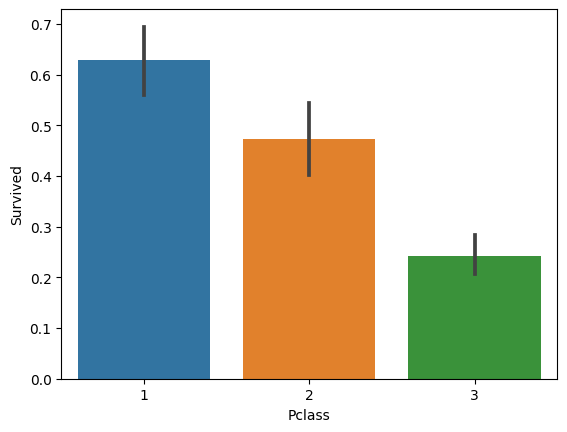

In [43]:
sns.barplot(x='Pclass', y='Survived', data=train)
print('Percentage of PClass1 survived:',train['Survived'][train['Pclass'] == 1].value_counts(normalize=True)[1]*100)
print('Percentage of PClass2 survived:',train['Survived'][train['Pclass'] == 2].value_counts(normalize=True)[1]*100)
print('Percentage of PClass3 survived:',train['Survived'][train['Pclass'] == 3].value_counts(normalize=True)[1]*100)

<AxesSubplot: xlabel='AgeGroup', ylabel='Survived'>

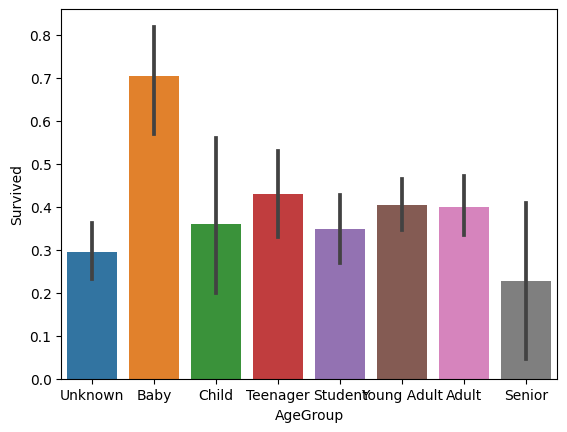

In [44]:
train.Age = train.Age.fillna(-0.5)
test.Age = test.Age.fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train.Age, bins, labels=labels)
test['AgeGroup'] = pd.cut(test.Age, bins, labels=labels)

sns.barplot(x='AgeGroup', y='Survived', data=train)

In [45]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [46]:
train.drop(['Ticket', 'Cabin','Fare'], axis=1, inplace=True)
test.drop(['Ticket', 'Cabin','Fare'], axis=1, inplace=True)

People embarked from Southampton: 644
People embarked from Cherbourg: 168
People embarked from Queenstown: 77


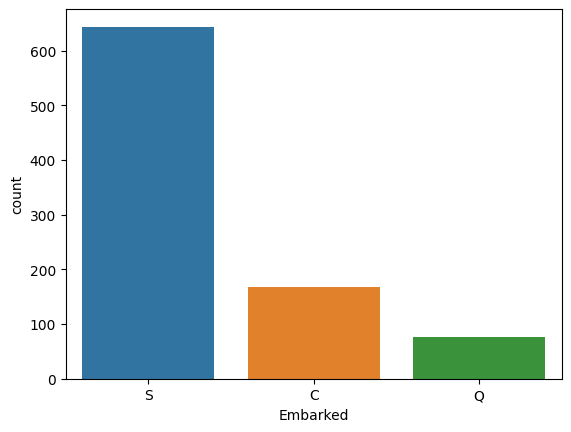

In [47]:
sns.countplot(x='Embarked',data=train)
print('People embarked from Southampton:', train[train['Embarked']=='S'].value_counts().sum())
print('People embarked from Cherbourg:', train[train['Embarked']=='C'].value_counts().sum())
print('People embarked from Queenstown:', train[train['Embarked']=='Q'].shape[0])

In [48]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
AgeGroup       0
dtype: int64

In [49]:
train.Embarked.fillna('S', inplace=True)

In [50]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [51]:
combine = [train, test]

In [52]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [53]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col','Don','Dr','Major','Rev','Dona','Jonkheer'],'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
train[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
5,Royal,1.000000
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.250000
2,Mr,0.156673


In [54]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5,'Royal': 6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [55]:
mr_age = train[train['Title'] == 1]['AgeGroup'].mode() #young adult
miss_age = train[train['Title'] == 2]['AgeGroup'].mode() #student
mrs_age = train[train['Title'] == 3]['AgeGroup'].mode() #adult
master_age = train[train['Title'] == 4]['AgeGroup'].mode() #baby
rare_age = train[train['Title'] == 5]['AgeGroup'].mode() #adult
royal_age = train[train['Title'] == 6]['AgeGroup'].mode() #adult
mr_age, miss_age, mrs_age, master_age, rare_age, royal_age

(0    Young Adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Unknown
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Baby
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'])

In [56]:
age_title_map = {1: 'Young Adult', 2: 'Student', 3: 'Adult', 4: 'Baby', 5: 'Adult', 6: 'Adult'}

for i in range(len(train['AgeGroup'])):
    if train['AgeGroup'][i] == 'Unknown':
        train['AgeGroup'][i] = age_title_map[train['Title'][i]]

        
for i in range(len(test['AgeGroup'])):
    if test['AgeGroup'][i] == 'Unknown':
        test['AgeGroup'][i] = age_title_map[test['Title'][i]]

In [57]:
train.AgeGroup.unique()

['Student', 'Adult', 'Young Adult', 'Baby', 'Teenager', 'Child', 'Senior']
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [59]:
from sklearn.preprocessing import LabelEncoder

transform = ['Sex','AgeGroup','Embarked']
le = LabelEncoder()
for feature in transform:
    train[feature] = le.fit_transform(train[feature])
    test[feature] = le.transform(test[feature])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,6,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,6,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,6,1


In [60]:
X_train = train.drop(['PassengerId','Name','Survived'], axis=1)
Y_train = train['Survived']
X_test = test.drop(['PassengerId','Name'], axis=1)

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

In [62]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
ids = test['PassengerId']
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': y_pred })
output.to_csv('titanic-predictions.csv', index = False)